# NN-Subsampling Algorithm

The sampling algorithm is an iterative process based on Nearest Neighbour search. 

In each iteration, the dataset is normalized with the standard scaler (mean = 0, standard deviation = 1) and a nearest-neighbour model is constructed and queried to find the nearest neighbor for each data point as well as the distance between them. If the distance is below a certain cutoff distance, the neighbor is removed with some probability. The process is iterated until there are no more points to be removed. 

The algorithm has two hyper-parameters: cutoff distance and deletion probability (rate). 

The cutoff distance controls the sparsity of the resulting representative dataset. Higher cutoff distances resulting in fewer sub-sampled points.
The deletion probability controls robustness. Lower deletion probablibity is more robust but resulting in slower execution. High deletion probablity might result in a "hole" in the subsampled dataset

High-dimensional datasets may also be pre-processed by principal component analysis (PCA) to reduce the dimensionality prior to subsampling


The illustration of the subsampling procedure is shown in the Figure below

<center>
    <img src="./subsample_schema.JPG" width = 500>
</center>

The Nearest-Neighbour search uses one of the packages below:

* FLANN: http://www.cs.ubc.ca/research/flann/

* pykdtree: https://github.com/storpipfugl/pykdtree

* Annoy: https://github.com/spotify/annoy

* nmslib: https://github.com/nmslib/nmslib/tree/master/python_bindings

* scipy cKDTree

* scikit-learn nearest neighbor

Please make sure you have at least one of these packages installed before trying the algorithm (also remember to specify the method in your script)

Also note that different packages may (sometimes very significantly) in speed, efficiency and result

## importing the functions

In [1]:
from NNSubsampling import subsampling, subsampling_with_PCA, \
                          batch_subsampling, batch_subsampling_with_PCA

## Detailed Explanations of the Functions
### Subsampling

subsampling(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", verbose = True):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    

    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [True]: Boolean. whether to output result of each iteration
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

    

### subsampling_with_PCA
subsampling_with_PCA(data, list_desc = [], standard_scale = True, cutoff_sig = 0.05, rate = 0.3, 
                                start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                                method = "pykdtree", verbose = True):
    
    Run the NN-based subsampling algorithm to a list of data points and 
    return the resulting list of subsampled data points
    
    The data set will first be transformed by PCA, before running the subsampling algorithm
    The number of PCs kept is the minimal number of PCs that have sum explained variance 
    greater than target_variance 
    
    Note that the final resulting list of datapoints (sampling_result) is NOT transformed
    (since we only used the PCA + subsampling alghorithm to find the indices of the datapoints to be kept)
    

    Parameters
    -------------
    data: List. the original list of data points
   
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
    
    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [True]: Boolean. whether to output result of each iteration
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling
batch_subsampling(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = True, shuffle = True):

    Subsample with batch
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [True]: Boolean. whether to output result of each iteration
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

### batch_subsampling_with_PCA

batch_subsampling_with_PCA(data, list_desc = [], batch_size = 1000000, recursive_level = 1, 
                             start_trial_component = 10, max_component = 30, target_variance = 0.999999, 
                             standard_scale = True, cutoff_sig = 0.05, rate = 0.3, method = "pykdtree", 
                             verbose = True, shuffle = True):
    
    '''
    Subsample with batch (with PCA pre-processing)
    This is to save the memory if the data set of interest is too large.
    
    The data set will first be broken down into equally sized batchs (defined by batch size)
    that will be subsampled individually.
    The resulting subsampled datapoints will then be pooled together for a overall subsample
    
    In case this is not sufficient, multi-level batch subsampling is also allowed.
    So instead of a overall subsample after pooling the resulting subsampled datapoints,
    the pooled data points will again be broken down into batches for a second-level batch subsample.
    This process is repeated multiple times (as defined by recursive_level) before eventually an 
    overall subsample is performed
    
    
    Parameters
    -------------
    data: List. the original list of data points
    
    list_desc [[] (empty list)]:  List.
                the indices of descriptors (features) of the datapoints. 
                The algorithm would subsample based only on these descriptors 
                (although other features will still be kept in the resulting subsampled dataset)
                If the list is empty, then all feature will be taken into account
                
    batch_size [1000000]: Int. the number of datapoints in each batch
    
    recursive_level [1]: Int. the number of levels for batch subsampling (as described above)

    standard_scale [True]: Boolean. Whether to apply standard scaler to the dataset prior to subsampling
    
    cutoff_sig [0.02]: Float. cutoff significance. the cutoff distance equals to the Euclidean 
                       norm of the standard deviations in all dimensions of the data points 
    
    rate [0.3]: Float. possibility of deletion
    
    start_trial_component [10]: Int. minimum number of PCs.
                           if the number of features is below this number, then all features will be kept
    
    max_component [30]: Int.the maximum number of PCs to be kept, 
                        even the target variance has not been reached
    
    target_variance [0.999999]: Float. the target sum of variance. 
    
    method ["pykdtree"]: String. which backend nearest neighbour model to use. 
                         possible choices: ["pykdtree", "nmslib", "sklearn", "scipy", "annoy", "flann"]
    
    verbose [True]: Boolean. whether to output result of each iteration
    
    shuffle [True]: Boolean. whether to shuffle the dataset before breaking down into batchs
    
    
    Return
    -------------
    sampling_result : the result list of subsampled data points

## Tests

### prepare plot function and dataset

Multi-dimensional normal distributed dataset

In [2]:
import time
import numpy as np
import random
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
def plot(data):
    
    x_subsampled = data[:,0]
    y_subsampled = data[:,1]

    dataframe = pd.DataFrame({'x':x_subsampled, 'y':y_subsampled, 'group':np.repeat('subsampled',len(x_subsampled))})
    sns.set(font_scale = 2)
    with sns.axes_style('white'):
        #g = sns.jointplot('x', 'y', data=dataframe,size=10,s=2,stat_func=None,marker='o', space = 0)
        g = sns.JointGrid(x="x", y="y",data=dataframe,space=0)
        g = g.plot_joint(plt.scatter, color = "b", s=30)

        g.set_axis_labels(fontsize=50)

        count = lambda a, b: len(a)
        g.annotate(count, template="{val:.0f}",stat="Count",loc="upper right", fontsize = 20)

        _ = g.ax_marg_x.hist(dataframe["x"], color = "b", alpha = 0.6, bins = np.arange(-0.5, 0.5, 0.02))
        _ = g.ax_marg_y.hist(dataframe["y"], color = "b", alpha = 0.6, orientation = "horizontal",bins = np.arange(0, 200, 4))
        plt.show()
    return

n = 1000000
x1_mu, x1_sigma = 0, 0.1
x2_mu, x2_sigma = 100, 20
x3_mu, x3_sigma = 15, 40
x4_mu, x4_sigma = -20, 5
x5_mu, x5_sigma = 1000, 0.1
x6_mu, x7_sigma = 0.0, 30
x7_mu, x6_sigma = 12, 2
x8_mu, x8_sigma = 50, 40
x9_mu, x9_sigma = 5, 20
x10_mu, x10_sigma = 10, 2


x1 = np.random.normal(x1_mu, x1_sigma, n)
x2 = np.random.normal(x2_mu, x2_sigma, n)
x3 = np.random.normal(x3_mu, x3_sigma, n)
x4 = np.random.normal(x4_mu, x4_sigma, n)
x5 = np.random.normal(x5_mu, x5_sigma, n)
x6 = np.random.normal(x6_mu, x6_sigma, n)
x7 = np.random.normal(x7_mu, x7_sigma, n)
x8 = np.random.normal(x8_mu, x8_sigma, n)
x9 = np.random.normal(x9_mu, x9_sigma, n)
x10 = np.random.normal(x10_mu, x10_sigma, n)

### Test 1: 2D toy case

Test the subsampling algorithm with different "rate" and "cutoff_sig" settings, with a 2D toy dataset 
#### in this test case, we only used pykdtree backend

2 observations can be made:
1. higher rate --> fewer iterations, faster execution, but less nicely distributed results
2. higher cutoff_sig --> more sparse resulting subsampled datapoints


/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


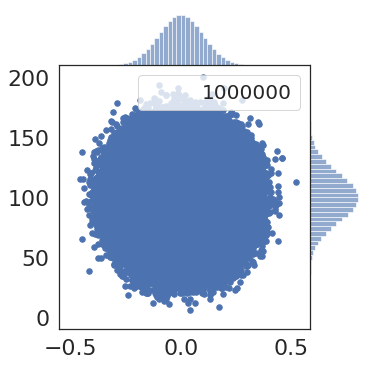

In [3]:
data_2D = np.column_stack((x1,x2))
plot(data_2D)

#### subsample with cutoff_sig = 0.05, rate = 0.2

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start total length: 1000000
end cycle. length: 812379	 time:2.3602967262268066
start total length: 812379
end cycle. length: 660401	 time:1.9944427013397217
start total length: 660401
end cycle. length: 537125	 time:1.627924919128418
start total length: 537125
end cycle. length: 437229	 time:1.2674627304077148
start total length: 437229
end cycle. length: 356020	 time:1.0296542644500732
start total length: 356020
end cycle. length: 289925	 time:0.8270695209503174
start total length: 289925
end cycle. length: 236094	 time:0.6655280590057373
start total length: 236094
end cycle. length: 192343	 time:0.5496399402618408
start total length: 192343
end cycle. length: 156658	 time:0.4147074222564697
start total length: 156658
end cycle. length: 127607	 time:0.331301212310791
start total length: 127607
end cycle. length: 104025	 time:0.28272199630737305
start total length: 104025
end cycle.

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


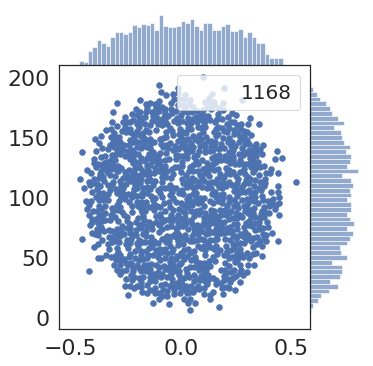

In [4]:
start = time.time()
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.2, method = "pykdtree"))
print("\n\ntotal time: {}".format(time.time()-start))

plot(subsampled)

#### subsample with cutoff_sig = 0.1, rate = 0.6

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start total length: 1000000
end cycle. length: 506913	 time:2.8877835273742676
start total length: 506913
end cycle. length: 261605	 time:1.6506106853485107
start total length: 261605
end cycle. length: 135737	 time:0.8106567859649658
start total length: 135737
end cycle. length: 70376	 time:0.4744703769683838
start total length: 70376
end cycle. length: 36754	 time:0.27102112770080566
start total length: 36754
end cycle. length: 19248	 time:0.13476276397705078
start total length: 19248
end cycle. length: 10245	 time:0.06911730766296387
start total length: 10245
end cycle. length: 5599	 time:0.04368233680725098
start total length: 5599
end cycle. length: 3174	 time:0.026365280151367188
start total length: 3174
end cycle. length: 1965	 time:0.015152215957641602
start total length: 1965
end cycle. length: 1394	 time:0.029608726501464844
start total length: 1394
end cycle. length: 1125

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


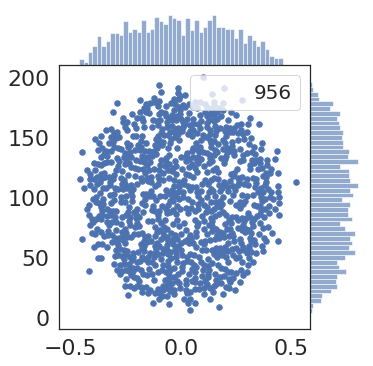

In [5]:
start = time.time()
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.1,rate=0.6, method = "pykdtree"))
print("\n\ntotal time: {}".format(time.time()-start))

plot(subsampled)

#### subsample with cutoff_sig = 0.4, rate = 0.2

Started NN-subsampling, original length: 1000000
use pykdtree backend
Subample with standard scaled data
start total length: 1000000
end cycle. length: 812495	 time:2.217349052429199
start total length: 812495
end cycle. length: 660362	 time:1.9722905158996582
start total length: 660362
end cycle. length: 537088	 time:1.5339226722717285
start total length: 537088
end cycle. length: 437000	 time:1.269867181777954
start total length: 437000
end cycle. length: 355783	 time:1.0354382991790771
start total length: 355783
end cycle. length: 289599	 time:0.8223226070404053
start total length: 289599
end cycle. length: 235894	 time:0.6808645725250244
start total length: 235894
end cycle. length: 192133	 time:0.5220832824707031
start total length: 192133
end cycle. length: 156452	 time:0.4355604648590088
start total length: 156452
end cycle. length: 127401	 time:0.34795284271240234
start total length: 127401
end cycle. length: 103723	 time:0.2733151912689209
start total length: 103723
end cycle.

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


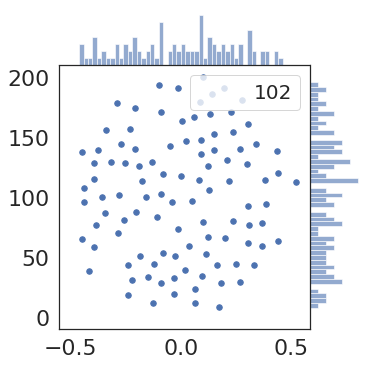

In [6]:
start = time.time()
subsampled = np.asarray(subsampling(data_2D,list_desc = [],cutoff_sig=0.4,rate=0.2, method = "pykdtree"))
print("\n\ntotal time: {}".format(time.time()-start))

plot(subsampled)

### Test 2: batch subsample test

Batch subsampling with 100,000 and 10,000 batch sizes were tested. 2 observations could be made:

1. subsampling based on small batchs sucessfully lowered the cost of the subsampling algorithm
2. seems the resulting sabsampled datasets are much more sparse

#### 100000 datapoints in a batch, with 2 levels of batch subsample
subsample with cutoff_sig = 0.1, rate = 0.2


at recursive level 1, length 1000000
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 811	 time:0.7647104263305664
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 859	 time:1.0097017288208008
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 874	 time:1.1311743259429932
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 891	 time:1.1159617900848389
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 861	 time:1.1335535049438477
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 851	 time:1.1208245754241943
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 877	 time:1.2303094863891602
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 894	 tim

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


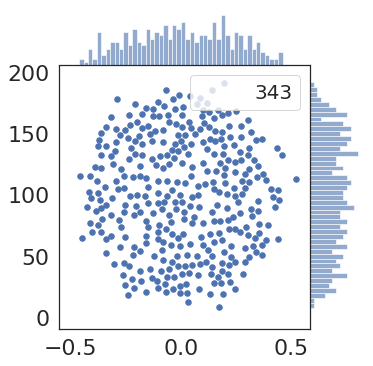

In [7]:
start = time.time()
subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 100000, recursive_level = 1, \
                                                      cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = False))

print("total time: {}".format(time.time()-start))

plot(subsampled)

at recursive level 2, length 1000000
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 463	 time:0.06672120094299316
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 520	 time:0.13485193252563477
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 539	 time:0.1194615364074707
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 575	 time:0.1489570140838623
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 567	 time:0.11355328559875488
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 582	 time:0.11657977104187012
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 564	 time:0.11665987968444824
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 581	 time:0

end subsampling. length: 616	 time:0.5263798236846924
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 603	 time:0.5057063102722168
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 595	 time:0.36020874977111816
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 615	 time:0.44219517707824707
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 605	 time:0.5443019866943359
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 594	 time:0.407548189163208
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 596	 time:0.13123059272766113
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 595	 time:0.14257240295410156
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. leng

/usr/local/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


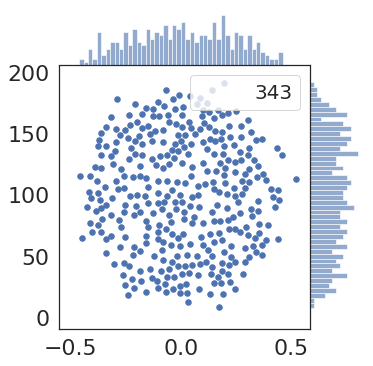

In [8]:
start = time.time()
temp_subsampled = np.array(batch_subsampling(data_2D,list_desc = [], batch_size = 10000, recursive_level = 2, \
                                                      cutoff_sig=0.1,rate=0.2, method = "pykdtree",verbose = False))

print("total time: {}".format(time.time()-start))

plot(subsampled)

### Test 3: scaling in multiple dimensions with different backend

2 different backends were tested

1. pykdtree backend seems to be very efficient for lower dimension dataset, but scales badly with number of dimensions

2. nmslib backed performed much worse for lower dimension datasets, but scales better with dimension

#### pykdtree backend

In [9]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "pykdtree",verbose = False)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

Started NN-subsampling, original length: 1000000
use pykdtree backend
end subsampling. length: 25	 time:13.007389068603516
2 dimensions, total time: 13.233220100402832


Started NN-subsampling, original length: 1000000
use pykdtree backend
end subsampling. length: 194	 time:28.179255962371826
5 dimensions,total time: 28.34602165222168


Started NN-subsampling, original length: 1000000
use pykdtree backend
end subsampling. length: 1492	 time:629.8177185058594
10 dimensions total time: 630.0295593738556




#### nmslib backend

In [10]:
temp = np.column_stack((x1,x2))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("2 dimensions, total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("5 dimensions,total time: {}\n\n".format(time.time()-start))

temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))
start = time.time()
subsampling(temp,list_desc = [], cutoff_sig=1.0,rate=0.2, method = "nmslib",verbose = False)

print("10 dimensions total time: {}\n\n".format(time.time()-start))

Started NN-subsampling, original length: 1000000
use nmslib backend
end subsampling. length: 23	 time:194.06100511550903
2 dimensions, total time: 194.26997423171997


Started NN-subsampling, original length: 1000000
use nmslib backend
end subsampling. length: 181	 time:320.51497316360474
5 dimensions,total time: 320.6615355014801


Started NN-subsampling, original length: 1000000
use nmslib backend
end subsampling. length: 1416	 time:653.84796667099
10 dimensions total time: 654.0281167030334




### Test 4: 10 dimension dataset batch subsample with PCA pre-processing

test PCA subsampling and batch PCA subsampling

The test shows that 
1. for higher dimension data, PCA preprocessing can help reducing the dimension hence the cost of the subsampling procedure

2. Again, with batch subsampling, the cost was reduced, although it seems less datapoints were kept 


In [14]:
temp = np.column_stack((x1,x2,x3,x4,x5,x6,x7,x8,x9,x10))

start = time.time()
subsampling_with_PCA(temp,list_desc = [], start_trial_component = 5, max_component = 10, target_variance = 0.99, \
                          cutoff_sig=1.0,rate=0.2, \
                          method = "pykdtree",verbose = False)
print("without batch, total time: {}\n\n".format(time.time()-start))

start = time.time()
batch_subsampling_with_PCA(temp,list_desc = [], start_trial_component = 5, max_component = 10, target_variance = 0.99, \
                          cutoff_sig=1.0,rate=0.2, batch_size = 100000, recursive_level = 2, \
                          method = "pykdtree",verbose = False)

print("100000 batch size, total time: {}\n\n".format(time.time()-start))

start = time.time()
batch_subsampling_with_PCA(temp,list_desc = [], start_trial_component = 5, max_component = 10, target_variance = 0.99, \
                          cutoff_sig=1.0,rate=0.2, batch_size = 10000, recursive_level = 2, \
                          method = "pykdtree",verbose = False)

print("10000 batch size, total time: {}\n\n".format(time.time()-start))

start trial PCA
end trial PCA, number of PC kept: 5 	 took 2.0998806953430176 s
Started NN-subsampling, original length: 1000000
use pykdtree backend
end subsampling. length: 194	 time:26.412404775619507
without batch, total time: 28.655890464782715


at recursive level 2, length 1000000
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.11124944686889648 s
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 116	 time:0.9406478404998779
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.11068391799926758 s
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 121	 time:1.3137664794921875
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.10711431503295898 s
Started NN-subsampling, original length: 100000
use pykdtree backend
end subsampling. length: 129	 time:1.4136459827423096
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.10375809669494629 s
Started NN-subsamp

end subsampling. length: 73	 time:0.23075628280639648
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.02674126625061035 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 81	 time:0.23728609085083008
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.011348247528076172 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 68	 time:0.2461850643157959
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.023501157760620117 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 79	 time:0.2360517978668213
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.018352746963500977 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 72	 time:0.24268174171447754
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.02669072151184082 s
Started NN-subsampling, original length: 10000
use p

end subsampling. length: 79	 time:0.22174358367919922
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.024717092514038086 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 80	 time:0.20641422271728516
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.018494606018066406 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 74	 time:0.22969889640808105
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.008260011672973633 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 74	 time:0.21629786491394043
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.038127899169921875 s
Started NN-subsampling, original length: 10000
use pykdtree backend
end subsampling. length: 69	 time:0.20145249366760254
start trial PCA
end trial PCA, number of PC kept: 5 	 took 0.019373416900634766 s
Started NN-subsampling, original length: 10000
u

### Test 5: MNIST dataset test

subsampling with PCA pre-processing and different backends

In [15]:
from mlxtend.data import loadlocal_mnist
from matplotlib import pyplot as plt

X, y = loadlocal_mnist(
        images_path='./train-images-idx3-ubyte', 
        labels_path='./train-labels-idx1-ubyte')


start trial PCA
stopped PCA at 121 components, total explained variance: 0.9318470573979855
end trial PCA, number of PC kept: 121 	 took 22.71196150779724 s
Started NN-subsampling, original length: 60000
use nmslib backend
end subsampling. length: 11	 time:49.66502380371094


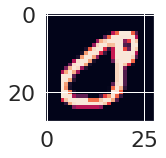

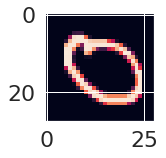

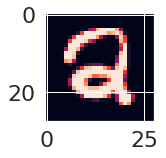

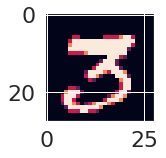

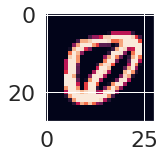

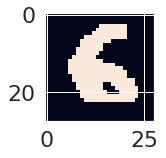

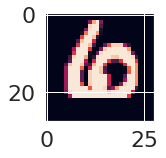

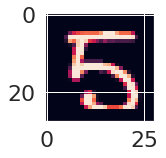

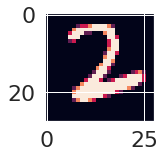

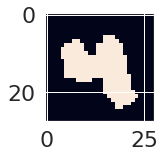

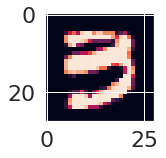

In [16]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "nmslib", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

start trial PCA
stopped PCA at 121 components, total explained variance: 0.9318470573979866
end trial PCA, number of PC kept: 121 	 took 21.786736011505127 s
Started NN-subsampling, original length: 60000
use pykdtree backend
end subsampling. length: 12	 time:742.9165825843811


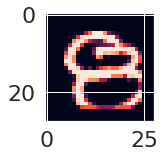

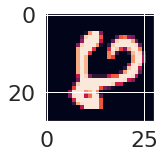

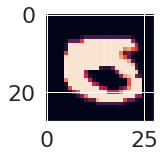

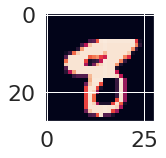

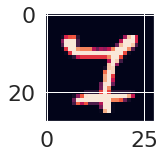

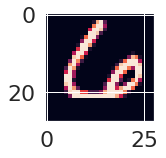

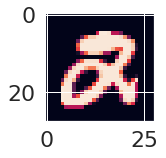

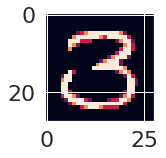

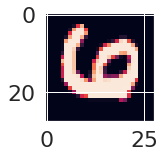

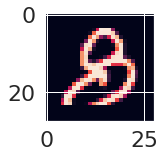

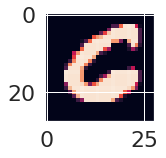

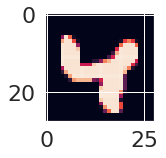

In [17]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "pykdtree", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

start trial PCA
stopped PCA at 121 components, total explained variance: 0.9318470573979855
end trial PCA, number of PC kept: 121 	 took 21.532997369766235 s
Started NN-subsampling, original length: 60000
use annoy backend
end subsampling. length: 12	 time:38.30416536331177


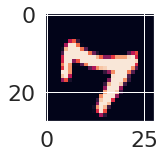

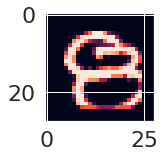

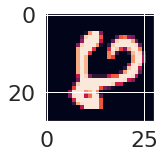

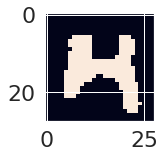

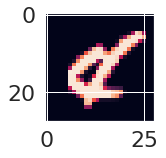

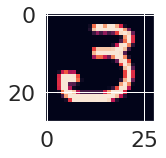

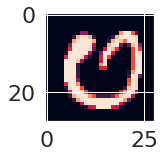

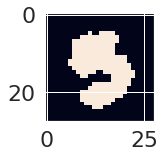

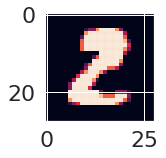

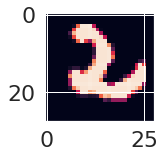

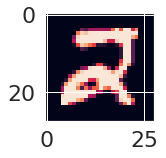

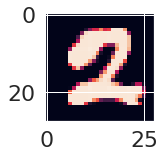

In [18]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "annoy", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

### Test 6: fashion-MNIST dataset test

subsampling with PCA pre-processing and different backend

In [19]:
X, y = loadlocal_mnist(
        images_path='./train-fasion-images-idx3-ubyte', 
        labels_path='./train-fasion-labels-idx1-ubyte')

start trial PCA
stopped PCA at 121 components, total explained variance: 0.9245309238264563
end trial PCA, number of PC kept: 121 	 took 22.073222875595093 s
Started NN-subsampling, original length: 60000
use nmslib backend
end subsampling. length: 8	 time:42.868821144104004


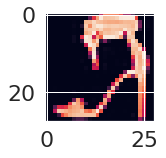

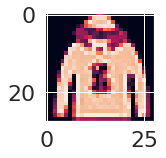

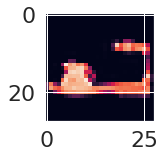

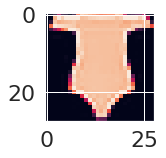

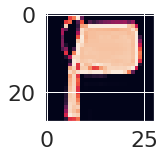

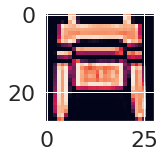

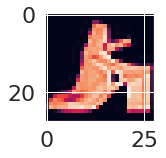

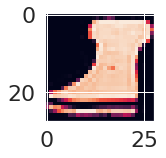

In [20]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "nmslib", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

start trial PCA
stopped PCA at 121 components, total explained variance: 0.9245309238264562
end trial PCA, number of PC kept: 121 	 took 24.358154296875 s
Started NN-subsampling, original length: 60000
use pykdtree backend
end subsampling. length: 13	 time:235.5810558795929


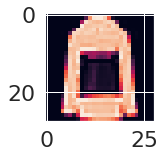

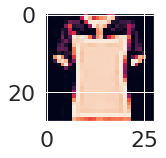

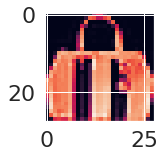

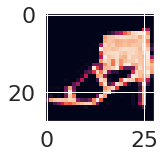

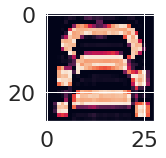

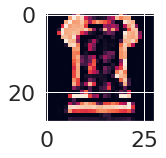

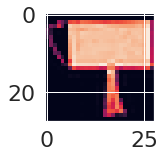

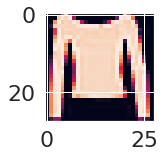

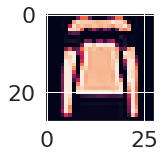

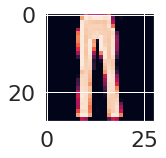

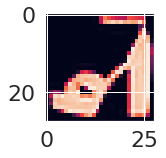

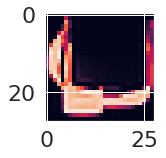

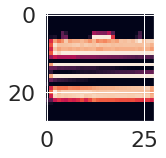

In [21]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "pykdtree", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()

start trial PCA
stopped PCA at 121 components, total explained variance: 0.9245309238264562
end trial PCA, number of PC kept: 121 	 took 21.421866416931152 s
Started NN-subsampling, original length: 60000
use annoy backend
end subsampling. length: 13	 time:37.78340125083923


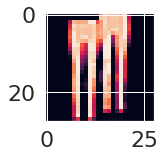

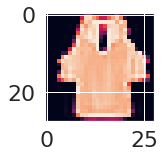

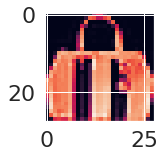

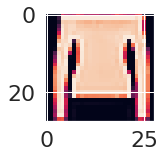

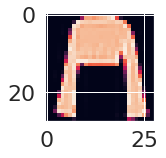

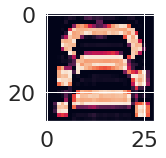

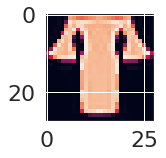

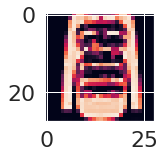

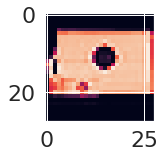

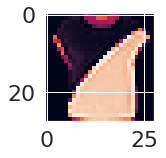

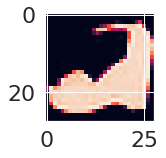

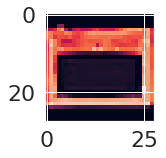

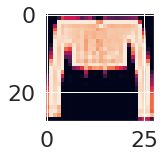

In [22]:
result = subsampling_with_PCA(X,list_desc = [],standard_scale = False, max_component = 120, target_variance = 0.98,\
                                     cutoff_sig=1.5,rate=0.1, method = "annoy", verbose = False)
for image in result:
    plt.figure(figsize=(2,2))
    plt.imshow(image.reshape(28,28))
    plt.show()